In [68]:
from langchain.agents import tool

In [69]:
@tool
def multiply(a:int,b:int)->int:
    '''This is a multiplication tool'''
    return a*b

In [70]:
multiply.invoke({"a":10,"b":4})

40

In [71]:
@tool
def get_word_length(word1):
    """This is a tool for calcualting the length of word"""
    return len(word1)

In [72]:
get_word_length.invoke({"word1":"pratham"})

7

In [73]:
def function1(input1):
    return input1 + " from function1"

In [74]:
def function2(input2):
    return input2 + " from function2"

In [75]:
def function3(input3):
    pass

In [76]:
from langgraph.graph import StateGraph
from typing import Annotated
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict

In [77]:
# Simple state - just a string value
State = str

In [78]:
workflow1=StateGraph(State)

In [79]:
workflow1.add_node("fun1",function1)

In [80]:
workflow1.add_node("fun2",function2)

In [81]:
workflow1.add_edge("fun1","fun2")

In [82]:
workflow1.set_entry_point("fun1")

In [83]:
workflow1.set_finish_point("fun2")

In [84]:
app=workflow1.compile()

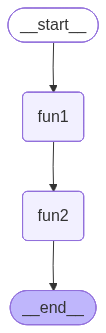

In [85]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [86]:
app.invoke("hi this is pratham")

'hi this is pratham from function1 from function2'

In [87]:
for output in app.stream("hi this is rohit"):
    for key,val in output.items():
        print(f"here is output from {key}")
        print("______")
        print(val)
        print("\n")

here is output from fun1
______
hi this is rohit from function1


here is output from fun2
______
hi this is rohit from function1 from function2




In [88]:
from langchain_openai import AzureChatOpenAI
import os
from dotenv import load_dotenv

load_dotenv()



True

In [89]:


def token_counter(input):
    return f"Number of tokens{len(input.split())}"
    

In [90]:
State2=str

In [91]:
workflow2=StateGraph(State2)

In [92]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))  # Go up one directory

from llm_provider import LLM_provider
llm=LLM_provider()

In [93]:
workflow2.add_node("My-LLM",llm.invoke)

In [94]:
workflow2.add_node("LLM_token_counter",token_counter)

In [95]:
workflow2.add_edge("My-LLM","LLM_token_counter")

In [96]:
workflow2.set_entry_point("My-LLM")
workflow2.set_finish_point("LLM_token_counter")

In [97]:
app2=workflow2.compile()

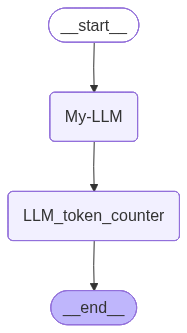

In [98]:
from IPython.display import Image,display
display(Image(app2.get_graph().draw_mermaid_png()))

In [99]:
app2.invoke("can you tell me about indias capital? just the answer")

'Number of tokens2'

In [100]:
for output in app2.stream("describe me in one word"):
    for key,val in output.items():
        print(f"here is output from {key}")
        print("______")
        print(val)
        print("\n")

here is output from My-LLM
______
Unique.


here is output from LLM_token_counter
______
Number of tokens1


